In [1]:
# Importing the libraries
from RBM import RBM
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np

In [2]:
#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

In [3]:
# Need to convert th data into binary variables
mnist_data.train_data = (mnist_data.train_data.type(torch.FloatTensor)/255).bernoulli()

The number shown is the number: 2


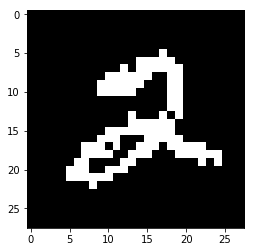

In [4]:
#Lets us visualize a number from the data set
idx = 5
img = mnist_data.train_data[idx]
print("The number shown is the number: {}".format(mnist_data.train_labels[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [29]:
# If we train on the whole set we expect it to learn to detect edges.
batch_size= 10
tensor_x = mnist_data.train_data.type(torch.FloatTensor) # transform to torch tensors
tensor_y = mnist_data.train_labels.type(torch.FloatTensor)
_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y) # create your datset
train_loader = torch.utils.data.DataLoader(_dataset,
                    batch_size=batch_size, shuffle=True,drop_last = True)

In [6]:
# I have have set these hyper parameters although you can experiment with them to find better hyperparameters.
visible_units=28*28
hidden_units = 500
k=3
learning_rate=0.01
learning_rate_decay = True
xavier_init = True
increase_to_cd_k = False
use_gpu = False


rbm_mnist = RBM(visible_units,hidden_units,k ,learning_rate,learning_rate_decay,xavier_init,
                increase_to_cd_k,use_gpu)

In [7]:
epochs = 30

rbm_mnist.train(train_loader , epochs,batch_size)

RBM fitting: 6000it [00:48, 123.29it/s]
Epoch:1 ,avg_cost = 0.5187586545944214 ,std_cost = 0.11880922317504883 ,avg_grad = 11062.1728515625 ,std_grad = 1942.8836669921875
RBM fitting: 6000it [00:44, 133.64it/s]
Epoch:2 ,avg_cost = 0.4091660678386688 ,std_cost = 0.04199724644422531 ,avg_grad = 9912.2900390625 ,std_grad = 479.3756103515625
RBM fitting: 6000it [00:43, 136.81it/s]
Epoch:3 ,avg_cost = 0.3883620500564575 ,std_cost = 0.03901270404458046 ,avg_grad = 9875.1826171875 ,std_grad = 488.4497375488281
RBM fitting: 6000it [00:43, 136.78it/s]
Epoch:4 ,avg_cost = 0.37726184725761414 ,std_cost = 0.03725451976060867 ,avg_grad = 9876.53515625 ,std_grad = 483.48492431640625
RBM fitting: 6000it [00:44, 134.55it/s]
Epoch:5 ,avg_cost = 0.37063342332839966 ,std_cost = 0.036325689405202866 ,avg_grad = 9914.2265625 ,std_grad = 495.3710021972656
RBM fitting: 6000it [00:46, 128.02it/s]
Epoch:6 ,avg_cost = 0.36511775851249695 ,std_cost = 0.03642882779240608 ,avg_grad = 9932.8037109375 ,std_grad = 50

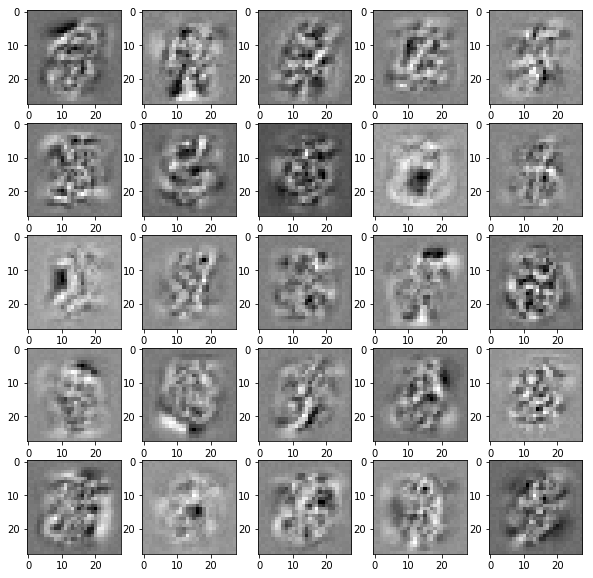

In [8]:
learned_weights = rbm_mnist.W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

In [27]:
#This is an unsupervised learning algorithm. So let us try training on one particular number.But first
# we need to seperate the data.

number = 5 #A number between 0 and 10.

particular_mnist = []

limit = mnist_data.train_data.shape[0]
# limit = 60000
for i in range(limit):
    if(mnist_data.train_labels[i] == number):
        particular_mnist.append(mnist_data.train_data[i].numpy())
# particular_mnist = np.array(particular_mnist)
len(particular_mnist)
# mnist_data.train_data

5421

In [30]:
tensor_x = torch.stack([torch.Tensor(i) for i in particular_mnist]).type(torch.FloatTensor)
tensor_y = torch.stack([torch.Tensor(number) for i in range(len(particular_mnist))]).type(torch.FloatTensor)


In [43]:
mnist_particular_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y)
mnist_particular_dataloader = torch.utils.data.DataLoader(mnist_particular_dataset,batch_size = batch_size,drop_last=True,num_workers=0)

In [57]:
visible_units=28*28
hidden_units = 500
k=3
learning_rate=0.01
learning_rate_decay = False
xavier_init = True
increase_to_cd_k = False
use_gpu = False


rbm_mnist = RBM(visible_units,hidden_units,k ,learning_rate,learning_rate_decay,xavier_init,
                increase_to_cd_k,use_gpu)


epochs = 10

rbm_mnist.train(mnist_particular_dataloader , epochs)

RBM fitting: 542it [00:03, 138.86it/s]
Epoch:1 ,avg_cost = 0.7568634748458862 ,std_cost = 0.16445103287696838 ,avg_grad = 10016.630859375 ,std_grad = 3283.735107421875
RBM fitting: 542it [00:03, 136.42it/s]
Epoch:2 ,avg_cost = 0.612907350063324 ,std_cost = 0.05789344012737274 ,avg_grad = 7897.47119140625 ,std_grad = 439.28643798828125
RBM fitting: 542it [00:03, 140.04it/s]
Epoch:3 ,avg_cost = 0.5575488209724426 ,std_cost = 0.05261055380105972 ,avg_grad = 7387.01806640625 ,std_grad = 362.75018310546875
RBM fitting: 542it [00:03, 141.34it/s]
Epoch:4 ,avg_cost = 0.5270386934280396 ,std_cost = 0.049349214881658554 ,avg_grad = 7096.7998046875 ,std_grad = 341.49737548828125
RBM fitting: 542it [00:03, 142.42it/s]
Epoch:5 ,avg_cost = 0.5060728788375854 ,std_cost = 0.045981165021657944 ,avg_grad = 6913.85595703125 ,std_grad = 326.37591552734375
RBM fitting: 542it [00:03, 141.25it/s]
Epoch:6 ,avg_cost = 0.48810896277427673 ,std_cost = 0.04613315686583519 ,avg_grad = 6766.43359375 ,std_grad = 329

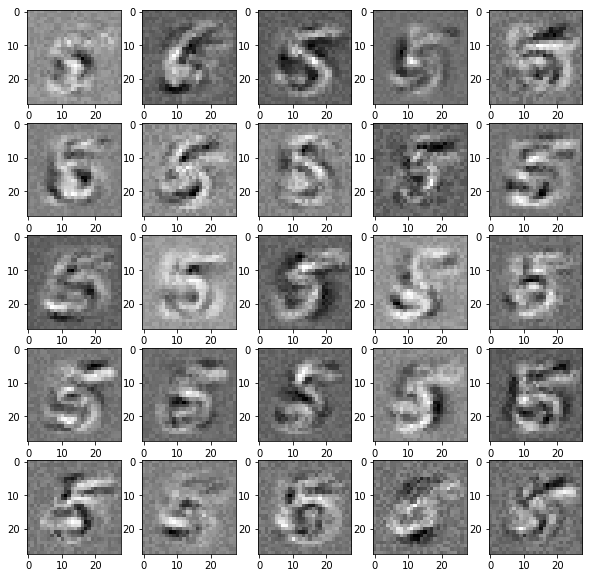

In [58]:
# This shows the weights for each of the 64 hidden neurons and give an idea how each neuron is activated.

learned_weights = rbm_mnist.W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i, :].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

The original number: 3


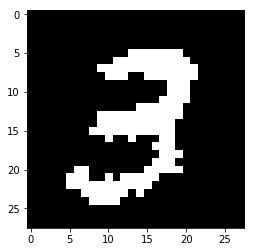

The reconstructed image


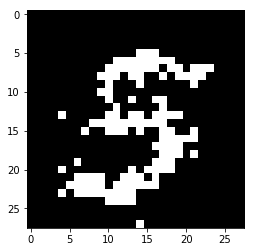

In [59]:
#Lets try reconstructing a random number from this model which has learned 5
idx = 7
img = mnist_data.train_data[idx]
reconstructed_img = img.view(-1).type(torch.FloatTensor)

# _ , reconstructed_img = rbm_mnist.to_hidden(reconstructed_img)
# _ , reconstructed_img = rbm_mnist.to_visible(reconstructed_img)

_,reconstructed_img = rbm_mnist.reconstruct(reconstructed_img,1)
# print(reconstructed_img)
reconstructed_img = reconstructed_img.view((28,28))
print("The original number: {}".format(mnist_data.train_labels[idx]))
plt.imshow(img , cmap = 'gray')
plt.show()
print("The reconstructed image")
plt.imshow(reconstructed_img , cmap = 'gray')
plt.show()